# __Extracted Tweets Data Analyis__

In [70]:
import os, json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [7]:
DATA_PATH = 'data/tweets/'

week_list = [week_dir for week_dir in os.listdir(DATA_PATH) if os.path.isdir(DATA_PATH+week_dir) and not week_dir.endswith('.ipynb_checkpoints')]
print('Amount of extracted weeks: ', len(week_list))

Amount of extracted weeks:  17


In [41]:
tweets_amount = 0
hashtag_list = []
amount_list = []
day_list = []
daily_amount_list = []
for week in week_list:
    for file in os.listdir(DATA_PATH+week):
        if file.endswith('.json'):
            with open(f'{DATA_PATH}{week}/{file}', encoding='utf-8') as week_info:
                data = json.load(week_info)
                amount_list.append(data['tweets_amount'])
                tweets_amount += data['tweets_amount']
                for day in data['days_info']:
                    day_list.append(f'{week}_{day}')
                    daily_amount_list.append(data['days_info'][day]['tweets_amount'])
                    for hashtag in data['days_info'][day]['top_10_hashtags']:
                        hashtag_list.append(hashtag.lower())
                        

### __Tweets Amount__

In [36]:
print(f'Amount of retrieved tweets: {tweets_amount}')

Amount of retrieved tweets: 2496823


### __TOP 10 Hashtags__

In [32]:
hashtag_series = pd.Series(hashtag_list)
hashtag_series.value_counts()[:10]

#forabolsonaro                 150
#cpidacovid                    146
#forabolsonarogenocida          73
#cpidapandemia                  60
#bolsonarogenocida              42
#cpidocirco                     33
#cpidogenocidio                 26
#bolsonaropresidenteate2026     23
#renanvagabundo                 21
#brasil                         20
dtype: int64

### __Time Series__

In [55]:
data = {
    'week': week_list,
    'tt_amount': amount_list
}
week_ts = pd.DataFrame(data)
week_ts.head()

,week,tt_amount
0,week_01,112329
1,week_02,107043
2,week_03,190956
3,week_04,157463
4,week_05,197430


In [62]:
week_ts.sort_values(by=['tt_amount'], ascending=False)[:3]

,week,tt_amount
9,week_10,269962
8,week_09,232180
12,week_13,207480


In [56]:
data = {
    'day': day_list,
    'tt_amount': daily_amount_list
}
day_ts = pd.DataFrame(data)
day_ts.head()

,day,tt_amount
0,week_01_day_1,8958
1,week_01_day_2,7632
2,week_01_day_3,12697
3,week_01_day_4,7369
4,week_01_day_5,4399


In [61]:
day_ts.sort_values(by=['tt_amount'], ascending=False)[:3]

,day,tt_amount
34,week_05_day_7,100000
113,week_r2_day_2,100000
64,week_10_day_2,90396


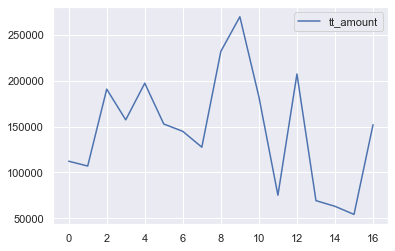

In [71]:
week_ts.plot()
pyplot.show()

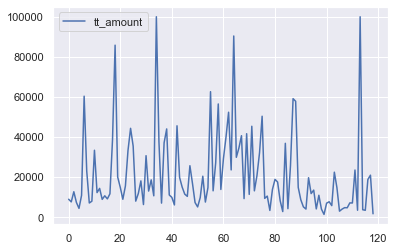

In [72]:
day_ts.plot()
pyplot.show()